In [20]:
#GET BASE KNOWLEDGE 

import pandas as pd
# import pandas to load and process spreadsheet-type data

IRIS_dataset=pd.read_csv('IRIS.csv') 

# load a medical dataset.

IRIS_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
set(IRIS_dataset['species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [22]:
from sklearn.model_selection import train_test_split

train_data ,test_data = train_test_split(IRIS_dataset,
            test_size=0.3,random_state=42)


In [23]:

#CREATE MODEL


from sklearn.tree import DecisionTreeClassifier

def diagnose_v4(train_dataset:pd.DataFrame):
    
    # create a Decision Tree Classifier
    model=DecisionTreeClassifier(random_state=1)

    # drop the diagnosis column to get only the symptoms
    train_patient_symptoms=train_dataset.drop(columns=['diagnosis'])

    # get the diagnosis column, to be used as the classification target
    train_diagnoses=train_data['diagnosis']

    # build a decision tree
    model.fit(train_patient_symptoms, train_diagnoses)

    # return the trained model
    return model

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


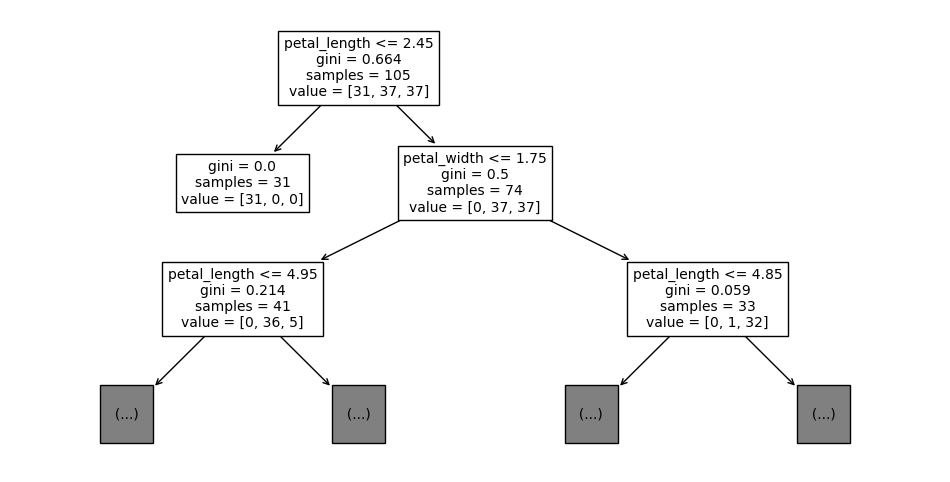

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


def diagnose_v4(train_data):
    
    X = train_data.iloc[:, :-1]  # جميع الأعمدة ما عدا الأخير كميزات
    y = train_data.iloc[:, -1]   # العمود الأخير هو الهدف
    
    # تدريب النموذج
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    
    return clf

# افتراض أن لديك بيانات train_data وmedical_dataset
my_tree = diagnose_v4(train_data)  # تدريب النموذج

print(my_tree.classes_)  # طباعة التصنيفات المحتملة

plt.figure(figsize=(12, 6))  # حجم الصورة

# تحويل الأعمدة إلى قائمة باستخدام tolist()
plot_tree(my_tree,
          max_depth=2,
          fontsize=10,
          feature_names=IRIS_dataset.columns[:-1].tolist()  # تحويل إلى قائمة
         )

plt.show()  # عرض الرسم


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

test_IRIS = test_data.drop(columns=['species'])

test_species = test_data['species']

pred = my_tree.predict(test_IRIS)

accuracy_score(test_species,pred)


1.0

In [27]:
confusion_matrix(test_species,pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)